## 1.	

#### Write a code to check how many rows are in the dataset. Check the sum of duplicates in the "City" column.

In [1]:
import pandas as pd

df = pd.read_csv("rental_car_analysis.csv")
df.tail()

,Date,City,Car Type,Rental Price,Discount,Final Price
95,10 01 2022,Philadelphia,Sports,145.0,0.0,145.000000
96,10 01 2022,San Antonio,Sports,NaN,NaN,190.000000
97,10 01 2022,San Diego,Sedan,64.0,0.0,64.000000
98,10 01 2022,Dallas,Truck,NaN,0.0,112.000000
99,10 01 2022,San Jose,Van,172.0,NaN,98.393954


In [2]:
# Printing number of rows in the dataset.
print(df.shape[0])

100


In [3]:
df.duplicated(subset=["City"]).sum()

90

## 2.	

#### Write a code to find missing data in the generated DataFrame. Which rows have missing data?

In [4]:
print(df.isnull().sum())

Date             0
City             0
Car Type         0
Rental Price    50
Discount        34
Final Price      0
dtype: int64


## 3.	

#### Using pandas, fill the missing values using the column median (numeric columns only).

In [5]:
# Filling missing values with the median of the column
df2 = df.fillna(df[["Rental Price", "Discount"]].median())

# Checking for missing values
df2.isnull().sum()

Date            0
City            0
Car Type        0
Rental Price    0
Discount        0
Final Price     0
dtype: int64

## 4.	

#### Which city brought it the most revenue?

In [6]:
city_most_revenue = df2.groupby('City')['Final Price'].sum().idxmax()
print("The City with most revenue: ",city_most_revenue)

The City with most revenue:  Phoenix


## 5.	

#### Which car type brought in the most money?

In [7]:
most_revenue_car = df2.groupby('Car Type')['Final Price'].sum().idxmax()
print("Car Type with most revenue: ",most_revenue_car)

Car Type with most revenue:  Van


## 6.	

#### Which car type is the most expensive to rent?

In [8]:
most_expensive_car = df2.groupby('Car Type')['Rental Price'].mean().idxmax()
print("The most expensive car type to rent: ",most_expensive_car)

The most expensive car type to rent:  Van


## 7.	

#### Which two cities brought in the least amount of revenue? 

In [9]:
# Group by city and sum the revenue
group_by_city = df2.groupby('City')['Final Price'].sum()

# Sorting the list in descending order return the two least profitable cities
least_profitable_car = group_by_city.sort_values(ascending=False).tail(2)
least_profitable_car

City
Houston        951.338397
San Antonio    870.153279
Name: Final Price, dtype: float64

## 8.	

#### Using pandas plot function, and Matplotlib, plot a bar plot of all the revenue brought in by each type of car.

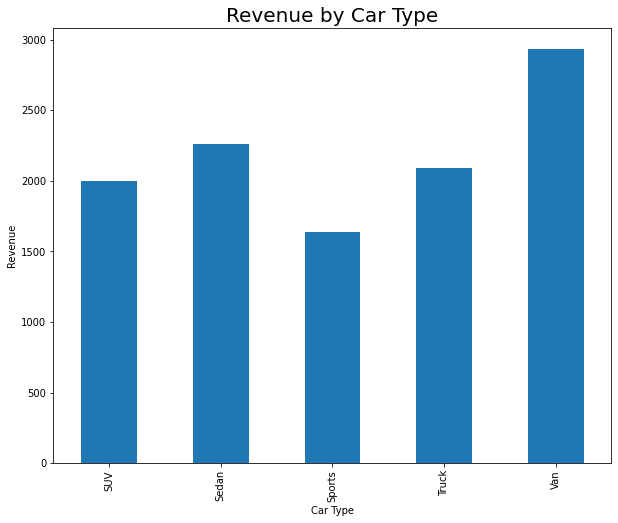

In [10]:
import matplotlib.pyplot as plt

# Group the data by car type and sum the revenue
car_revenue = df2.groupby('Car Type')['Final Price'].sum()

# Plot the revenue of each car type
plt.figure(figsize=(10, 8))
car_revenue.plot(kind='bar', x='car_type',
                 y='car_revenue')


plt.title("Revenue by Car Type", fontsize = 20)
plt.ylabel(ylabel= "Revenue")
plt.show()

## 9.	

#### What is the total revenue of the business of this car rental business? 

In [11]:
total_revenue = df2['Final Price'].sum()
print(f'The total_revenue is {total_revenue:.2f}')

The total_revenue is 10926.06


## 10.	

#### What would be the total revenue if no discount was given?

In [12]:
# Using the rental price column to find total before discount
no_discount_revenue = df2['Rental Price'].sum() 
print(f'The total revenue before discount is {no_discount_revenue:.2f}')

The total revenue before discount is 12542.00
